# Prática Independente - Inferência Estatística II.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Standard size of figures on this notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

#### Exercício 1 - Use as bilbiotecas `Pandas`e `Numpy` para gerar distribuições aleatórias normais, aplique o método [`np.random.binomial()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) para estudar a distribuição com um número de tentativas `n` e uma probabilidade de ocorrência `p`.

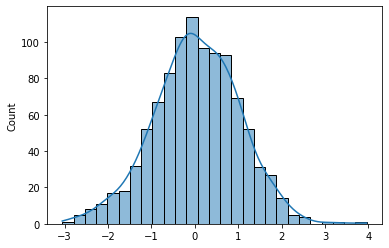

In [ ]:
#Com numpy
np.random.seed(1)

media, desvio_padrao = 0, 1
x = np.random.normal(media, desvio_padrao, 1000)
sns.histplot(x, kde= True);

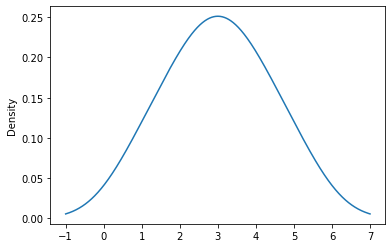

In [ ]:
#Com pandas
s = pd.Series([1, 2, 2.5, 3, 3.5, 4, 5])
ax = s.plot.kde()

Vamos medir a probabilidade de tirar 3 caras em cada 10 lançamentos de uma moeda justa a partir do cálculo de 1000 amostras

In [ ]:
np.random.seed(2)
n = 10 # tamanho de cada amostra
p = 0.5 #temos 50% de probabilidade de tirar cara em cada lançamento
totais_amostras = 1000

prob_3 = sum([1 for i in np.random.binomial(n, p, size=totais_amostras) if i==3]) / totais_amostras
prob_3 = round(prob_3 * 100, 2)
print('A probabilidade de 3 caras a cada 10 lançamentos é de: ' + str(prob_3) + '%')

A probabilidade de 3 caras a cada 10 lançamentos é de: 11.6%


#### Exercício 2 - Considere a chance de um tornado ocorrer em meio a uma tempestade como sendo `chance_of_tornado` = $0.01/100$, quantos tornados esperamos que ocorram em $1000000$ tempestades?

In [ ]:
np.random.seed(3)

n = 100 # Tempestades
p = 0.01 # Probabilidade de tornado a cada tempestade

s = np.random.binomial(n, p, 1000000) #Gerando distribuição binomial aleatória se houve ou não tornado a cada 100 tempestades
totais_de_tornados_ocorridos = sum(s) #Somando a quantidade de tornados "ocorridos"

print(f'Em 1000000 (um milhão) de tempestades esperamos que ocorra por volta de : {totais_de_tornados_ocorridos} tornados.')

Em 1000000 (um milhão) de tempestades esperamos que ocorra por volta de : 1001332 tornados.


#### Exercício 3 - Imagine agora que queremos calcular o número de casos em que dois tornados ocorrem em dois dias consecutivos, aplique o método `np.random.binomial` para calcular o número de eventos de sucesso sob essa condição.

In [ ]:
np.random.seed(4)
n = 1 # amostra (cada dia)
p = 0.01 # Probabilidade de tornado a cada dia (supondo que seja 1% de chance a cada dia)

s = np.random.binomial(n, p, 365) #Gerando distribuição binomial aleatória se houve ou não tornado em um ano

sucesso = 0

for i in range (len(s)):
  dia_atual = s[i]
  dia_anterior = s[i -1]
  if dia_atual == 2 and dia_anterior == 2:
    sucesso += 1
  
print(f'Total de dois tornados ocorridos em dois dias consecultivos: {sucesso}')


Total de dois tornados ocorridos em dois dias consecultivos: 0


#### Exercício 4 - Estude as distribuições uniformes com o auxílio do método [`np.random.uniform()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) para uma distribuição limitada pelo intervalo `[0, 1]` e $100$ observaçoes. Estude também a distribuição normal, com o método [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), com média em $0.75$, desvio padrão de $1$ e também $100$ observações.

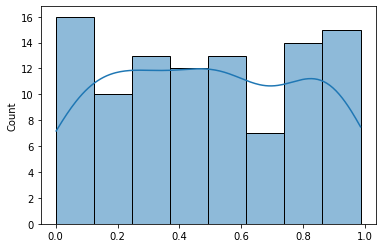

In [ ]:
np.random.seed(5)
distribuicao_uniforme = np.random.uniform(low=0, high=1, size=100)
sns.histplot(distribuicao_uniforme, kde= True);

Podemos perceber que a ocorrência dos valores são similares numa distribuição uniforme. Nesse sentido, a probabilidade de selecionar aleatoriamente um valor desta distribuição é muito próxima de qualquer valor presente na distribuição.

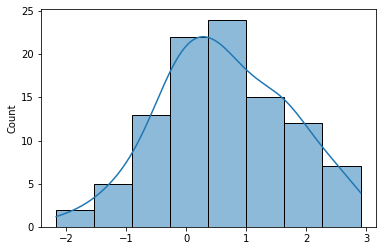

In [ ]:
np.random.seed(3)
distribuicao_normal = np.random.normal(loc=0.75, scale=1, size=100)
sns.histplot(distribuicao_normal, kde= True);

Na distribuição normal, por sua vez, temos uma concentração maior dos valores até dois desvios padrão abaixo e acima da media (cerca de 95% dos dados). Nesse sentido, possuímos "bordas" na distribuição que são compostas por valores mais incomuns presentes nela.

#### Exercício 5 - Considerando a Fórmula para o desvio padrão a seguir, calcule o valor para a distribuição normal do exercício 4.
$$
\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}
$$

#### Compare o valor encontrado com aquele gerado pelo método [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

In [ ]:
def standard_deviation(distribution):
  
  """Calculate the standard deviation of any population distribution
  """

  from math import sqrt

  mean = np.mean(distribution) # distribution mean

  deviations = [] #list that will store deviation for each data point to the mean

  for x in distribution:
    
    squared_deviation = pow(x - mean, 2) # deviation of a data point
    
    deviations.append(squared_deviation) 

  sum_of_squared_deviations = sum(deviations) / len(deviations) # Sum of every data point deviation from the mean
  
  standard_deviation = sqrt(sum_of_squared_deviations) # standard deviation of the sample distribution

  return standard_deviation

In [ ]:
print(f'Desvio padrão de função feita "à mão": {standard_deviation(distribuicao_normal)}')
print(f'Desvio padrão com função do numpy: {np.std(distribuicao_normal)}')

Desvio padrão de função feita "à mão": 0.9668617247280397
Desvio padrão com função do numpy: 0.9668617247280397


As duas funções trouxeram valores iguais. É importante ressaltar que utilizamos a fórmula de desvio padrão que usualmente é utilizada para uma distribuição de população, isto é, quando você possui dados de todos os "indivíduos" que serão abordados em seu estudo. Para desvio padrão de uma amostra necessitamos somente subtrair 1 de n na função e teríamos, com isso, o desvio padrão amostral.

#### Exercício 6 - Utilize o método [`stats.kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) para estudar a curtose ([Kurtosis](https://en.wikipedia.org/wiki/Kurtosis)) e o método [`stats.skew()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)para estudar a assimetria ([Skewness](https://en.wikipedia.org/wiki/Skewness)), da distribuição criada no exercício 5.

Kurtosis:

"The kurtosis of any univariate normal distribution is 3. It is common to compare the kurtosis of a distribution to this value. Distributions with kurtosis less than 3 are said to be platykurtic, although this does not imply the distribution is "flat-topped" as is sometimes stated. Rather, it means the distribution produces fewer and less extreme outliers than does the normal distribution. An example of a platykurtic distribution is the uniform distribution, which does not produce outliers. 

Distributions with kurtosis greater than 3 are said to be leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian, and therefore produces more outliers than the normal distribution. It is also common practice to use an adjusted version of Pearson's kurtosis, the excess kurtosis, which is the kurtosis minus 3, to provide the comparison to the standard normal distribution." [Wikipedia](https://en.wikipedia.org/wiki/Kurtosis)

In [ ]:
# Vamos medir a kurtosis das distribuições normal e uniforme geradas no exercício 4 pra saber o nível de outliers que elas possuem
from scipy.stats import kurtosis

print(f'Nível de outliers na distribuição normal: {kurtosis(distribuicao_normal, fisher= False):.2}')
print(f'Nível de outliers na distribuição uniforme: {kurtosis(distribuicao_uniforme,fisher= False):.2}')

Nível de outliers na distribuição normal: 2.6
Nível de outliers na distribuição uniforme: 1.7


O resultado faz sentido já que a distribuição uniforme, como mencionado, possui um maior equílibrio na ocorrência dos valores. Ao passo que as distribuições normais possuem "caldas" compostas pelos outliers. 

O nível de kurtosis da distribuição normal menor que 3 também nos indica uma distribuição não tão ajustada, o que não significa que ela não seja uma distribuição normal. 

Nesse caso geramos uma distribuição normal com o numpy, mas se estivéssemos trabalhando com dados reais necessitaríamos aplicar testes de normalidade em nossa distribuição visando à sua interpretação e a melhor escolha do modelo de aprendizado de máquina para utilizá-los.

In [ ]:
#Vamos agora medir o nível de distorção da nossa distribuição normal
from scipy.stats import skew

print(f'Nível de distorção na distribuição normal: {skew(distribuicao_normal):.2}')

Nível de distorção na distribuição normal: -0.0049


Temos um valor bem próximo de zero, o que nos daria um forte indício (sem o recurso do gráfico) das possíveis distribuições de nossos dados (tendo em vista que existem outras distribuições com baixa distorção tal como a normal). 

#### Exercício 7 - Aplique o método ([`np.random.chisquare()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html)) e calcule uma distribuição $\chi^{2}$ aleatória, com $2$ graus de liberdade e $10000$ observações. Em seguida estude a simetria de tal distribuição. Em seguida reproduza o mesmo exercício com $5$ graus de liberdade. Em seguida plote e compare as duas distribuições.

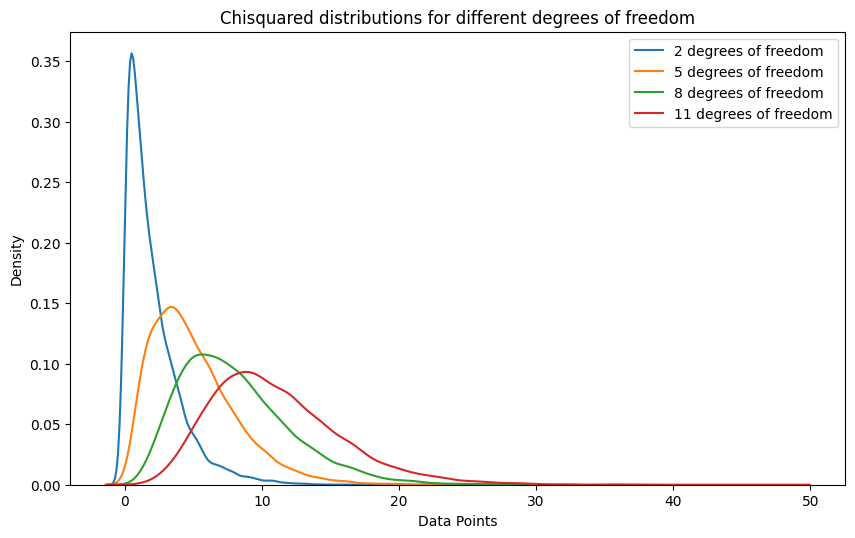

In [9]:
degrees_of_freedom = [2, 5, 8, 11]

for df in degrees_of_freedom:
  chisquare_distribution = np.random.chisquare(df, 10000)
  sns.kdeplot(chisquare_distribution)
  
plt.title('Chisquared distributions for different degrees of freedom')
plt.xlabel('Data Points')
plt.legend(('2 degrees of freedom', '5 degrees of freedom', 
            '8 degrees of freedom', '11 degrees of freedom'), loc= 'best');

Graus de liberdade: pedaços de informação (dados) que nós temos para estimar (estamos trabalhando com amostras) parametros reais da população.

Podemos perceber que conforme aumentamos os graus de liberdade da distribuição ela vai adquirindo um formato mais equilibrado entre as observações, e na situação inversa ela se concentra como uma distribuição enviesada à direita. Tendo em vista que quando aumentamos o grau de liberdade estamos aumentando as informações que temos da população, parece fazer sentido que quanto maior o grau de liberdade, mais equilibrada (esparsa) a nossa distribuição vai ficando.

[Degrees of Freedom in Statistics](https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/)

#### Exercício 8 - Faça a leitura do arquivo `'grades.csv'` com notas e datas de submissão de tarefas. Separe a base de dados entre aquelas em que a submissão da primeira tarefa 1 ocorreu antes ou no dia '2015-12-31', daquelas em que a submissão da tarefa 1 ocorreu depois do dia '2015-12-31'. Aplique o método [`stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) e calcule as médias das tarefas, dada essa condição, e realize o teste de hipótese de que as médias não serão diferentes antes ou depois de '2015-12-31', para todas as tarefas da base de dados. Discuta seus resultados.

In [ ]:
df = pd.read_csv('grades.csv')
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              2315 non-null   object 
 1   assignment1_grade       2315 non-null   float64
 2   assignment1_submission  2315 non-null   object 
 3   assignment2_grade       2315 non-null   float64
 4   assignment2_submission  2315 non-null   object 
 5   assignment3_grade       2315 non-null   float64
 6   assignment3_submission  2315 non-null   object 
 7   assignment4_grade       2315 non-null   float64
 8   assignment4_submission  2315 non-null   object 
 9   assignment5_grade       2315 non-null   float64
 10  assignment5_submission  2315 non-null   object 
 11  assignment6_grade       2315 non-null   float64
 12  assignment6_submission  2315 non-null   object 
dtypes: float64(6), object(7)
memory usage: 235.2+ KB
